# IOS trends and carbon offsetting projects

Following https://www.nature.com/articles/s43247-024-01313-x

In [1]:
import xarray as xr
import geopandas as gpd
import numpy as np
import pandas as pd

import branca.colormap as cm
import matplotlib.pyplot as plt
import matplotlib as mpl
from odc.geo.xr import assign_crs

import contextily as ctx
from odc.geo.xr import assign_crs
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

# Open data

In [4]:
hir = gpd.read_file('/g/data/os22/chad_tmp/Aus_phenology/data/ActiveHIR_ERF_CEA_Project_Mapping_20230215.geojson')

p_average = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/mean_phenology_perpixel_circular.nc'), crs='EPSG:4326')
p_trends = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/trends_phenology_perpixel_circular.nc'), crs='EPSG:4326')

## Plot active project areas over IOS trends

In [5]:
season_per_year = p_average['n_seasons']/p_average['n_years']
non_seasonal = xr.where((season_per_year <= 0.90),1,0)
extra_seasonal = xr.where((season_per_year >= 1.1),1,0)
seasonality_mask = (non_seasonal | extra_seasonal)

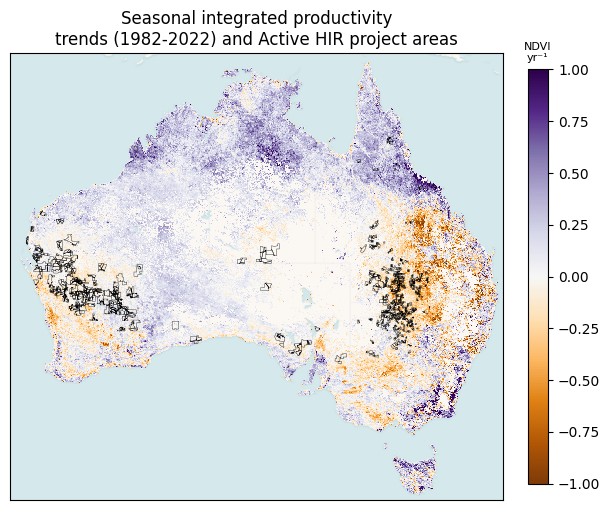

In [8]:
fig,ax=plt.subplots(1,1, figsize=(6,6),  layout='constrained')

cmap='PuOr'
vmin, vmax=-1, 1
label='NDVI\nyr⁻¹'

im=p_trends['IOS_slope'].where(seasonality_mask!=1).plot(ax=ax, add_colorbar=False, cmap=cmap, vmin=vmin, vmax=vmax, add_labels=False)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.VoyagerNoLabels, crs='EPSG:4326', attribution='', attribution_size=1)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

hir.plot(ax=ax, color=None, facecolor="none", edgecolor='k',linewidth=0.25)

#need to create colorbar manually to have label on top
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.ax.set_title(label, fontsize=8)
ax.set_title(f'Seasonal integrated productivity\ntrends (1982-2022) and Active HIR project areas', fontsize=12);

fig.savefig(f'/g/data/os22/chad_tmp/Aus_phenology/results/figs/carbon_offsets_and_IOS.png',
          bbox_inches='tight', dpi=300);